In [4]:
from pathlib import Path

import cv2
import matplotlib.pyplot as plt

from ssd.data import SSDDataset

### Display label on original image

In [5]:
im = cv2.imread("/mnt/data/code/ssd/test_data/dog.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [6]:
objects = SSDDataset.read_label_file(Path("/mnt/data/code/ssd/test_data/dog.txt"))
cx, cy, w, h = objects[0, 1:].numpy()
cx *= im.shape[1]
cy *= im.shape[0]
w *= im.shape[1]
h *= im.shape[0]

left = int(cx - w/2)
right = int(cx + w/2)
top = int(cy - h/2)
bottom = int(cy + h/2)

im = cv2.rectangle(im, (left, top), (right, bottom), (255, 0, 0), thickness=2)

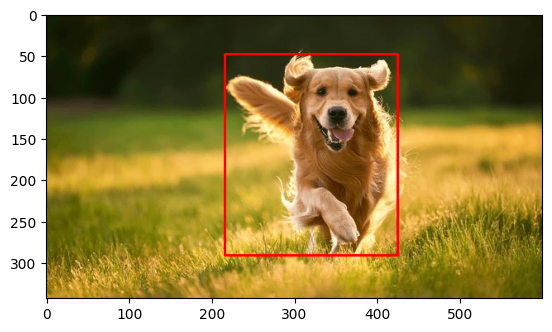

In [7]:
plt.imshow(im)

### Display label on letterboxed image

In [8]:
from pathlib import Path

import cv2
import torch
import matplotlib.pyplot as plt
import numpy as np

from ssd.data import LetterboxTransform, SSDDataset

In [9]:
im = cv2.imread("/mnt/data/code/ssd/test_data/dog.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im_tensor = torch.tensor(im).permute((2, 0, 1))

objs = SSDDataset.read_label_file(Path("/mnt/data/code/ssd/test_data/dog.txt"))

transform = LetterboxTransform()
out_im, out_objs = transform(im_tensor, objs)
out_im = out_im.permute((1, 2, 0)).numpy().astype(dtype=np.uint8).copy()

cx, cy, w, h = out_objs[0, 1:].numpy()
cx *= out_im.shape[1]
cy *= out_im.shape[0]
w *= out_im.shape[1]
h *= out_im.shape[0]

left = int(cx - w/2)
right = int(cx + w/2)
top = int(cy - h/2)
bottom = int(cy + h/2)

out_im = cv2.rectangle(out_im, (left, top), (right, bottom), (255, 0, 0), thickness=2)

tensor([[0.0000, 0.5358, 0.4942, 0.3483, 0.7085]])
tensor([[0.0000, 0.5358, 0.4950, 0.3483, 0.4038]])


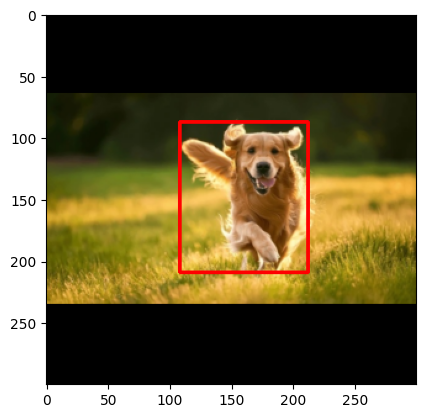

In [10]:
plt.imshow(out_im)

In [1]:
import torch

In [5]:
x = torch.rand((8732, 4))
y = torch.tensor([0, 10, 20, 40, 80])

In [7]:
x[y]

tensor([[0.3116, 0.1946, 0.9311, 0.4095],
        [0.5087, 0.6596, 0.6633, 0.1192],
        [0.8226, 0.0645, 0.8250, 0.9947],
        [0.3168, 0.0907, 0.1105, 0.9618],
        [0.8100, 0.0082, 0.1732, 0.5515]])

In [12]:
x[80, :]

tensor([0.8100, 0.0082, 0.1732, 0.5515])